# KNN Code Demo

- **Objective**: Develop a K-Nearest Neighbors model as a classifier for this example.
- **Dataset**: Working with the Iris dataset, there are three classes of flower species, we need to use the features to properly classify the species.

In [42]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading in dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Checking for **missing values**.

In [44]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## EDA

In [45]:
#Check quantitative variables statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


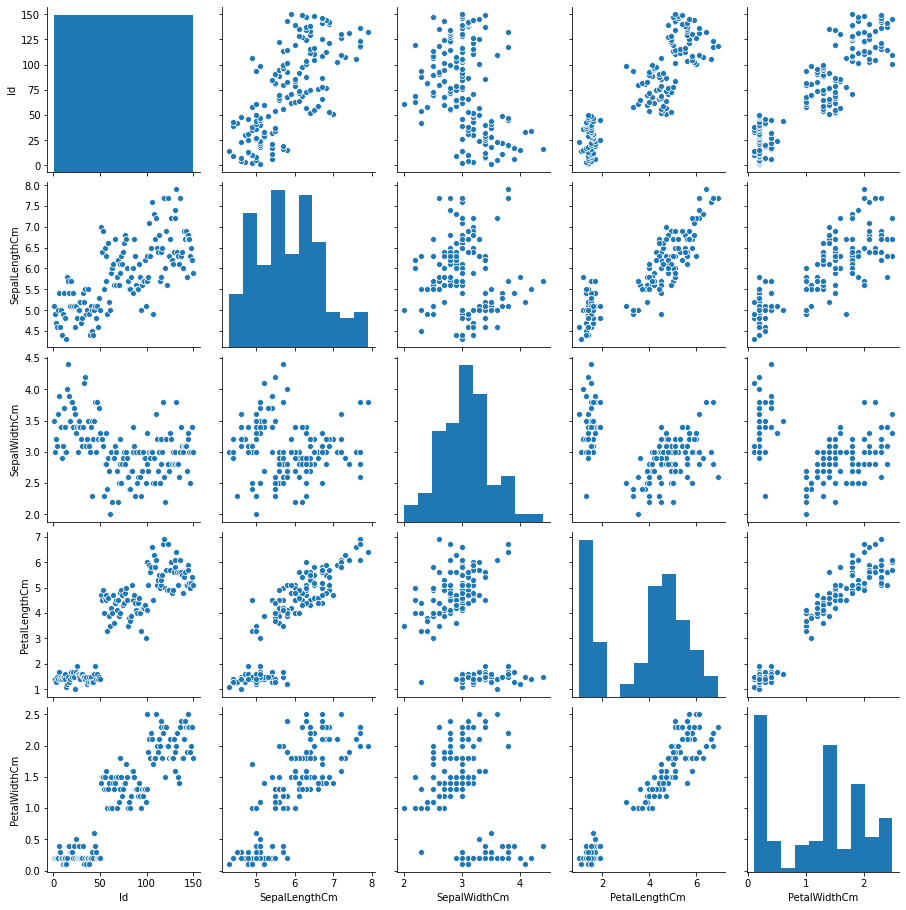

In [48]:
sns.pairplot(df)

Explore the **response variable** for the three different flower species classes.

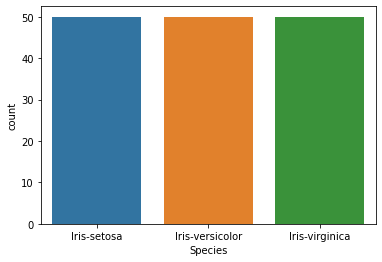

In [46]:
sns.countplot(x='Species', data = df) #each have 50, we have a balanced dataset

## Train Test Split & Preprocessing

In [24]:
X = df.drop('Species', axis = 1)
y = df['Species']

Need to encode the **categorical response** variable in species.

In [26]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
y = labelEnc.fit_transform(y)

The response is now **encoded** we can split the dataset.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

/Applications/anaconda3/envs/deeplearning/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Model Building

In [29]:
from sklearn.neighbors import KNeighborsClassifier #We have a classification problem so use KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=3) #Using nearest neighbors value of 3
classifier.fit(X_train, y_train) #Fitting the model
predictions = classifier.predict(X_test) #Model predictions

## Evaluate Model

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,predictions) #We have accurately predicted all observations

array([[12,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 16]])

In [36]:
#100% accuracy with our model
accuracy = accuracy_score(y_test, predictions)*100
accuracy

100.0

Though our model has 100% accuracy, this is highly unlikely in other scenarios and often times you have to tune your model. We happened to guess a good number of neighbors (**K Value**) but in other cases it is often trial and error to find the most **optimal K value** with the least error. Let's go over the process to check for the ideal K value.

## Tuning the Model 

Text(0, 0.5, 'Error Rate')

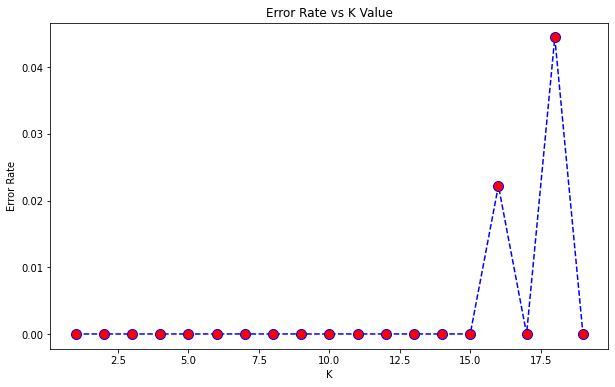

In [41]:
#Choosing K Value
error_rate = []

#Iterate through a range of k values to test
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#Elbow graph to visualize the optimal k value
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #Can see within graph where k value levels off/is lowest